In [181]:
import pygmt
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


**Figure Number 1**

This code creates a map of Interior to Eastern Interior Alaska, where the location of my study is. The study site is Manh Choh, located SW of Tok, Alaska. 

This code uses:
- Coordinate of locations I want to plot on the map.
- Pygmt for the map.
- A file called "Roads_AKDOT_6859052738519254347.geojson" to plot the major roadways to and from Tok and Fairbanks.
- An inset map to show where in Alaska the study location is.

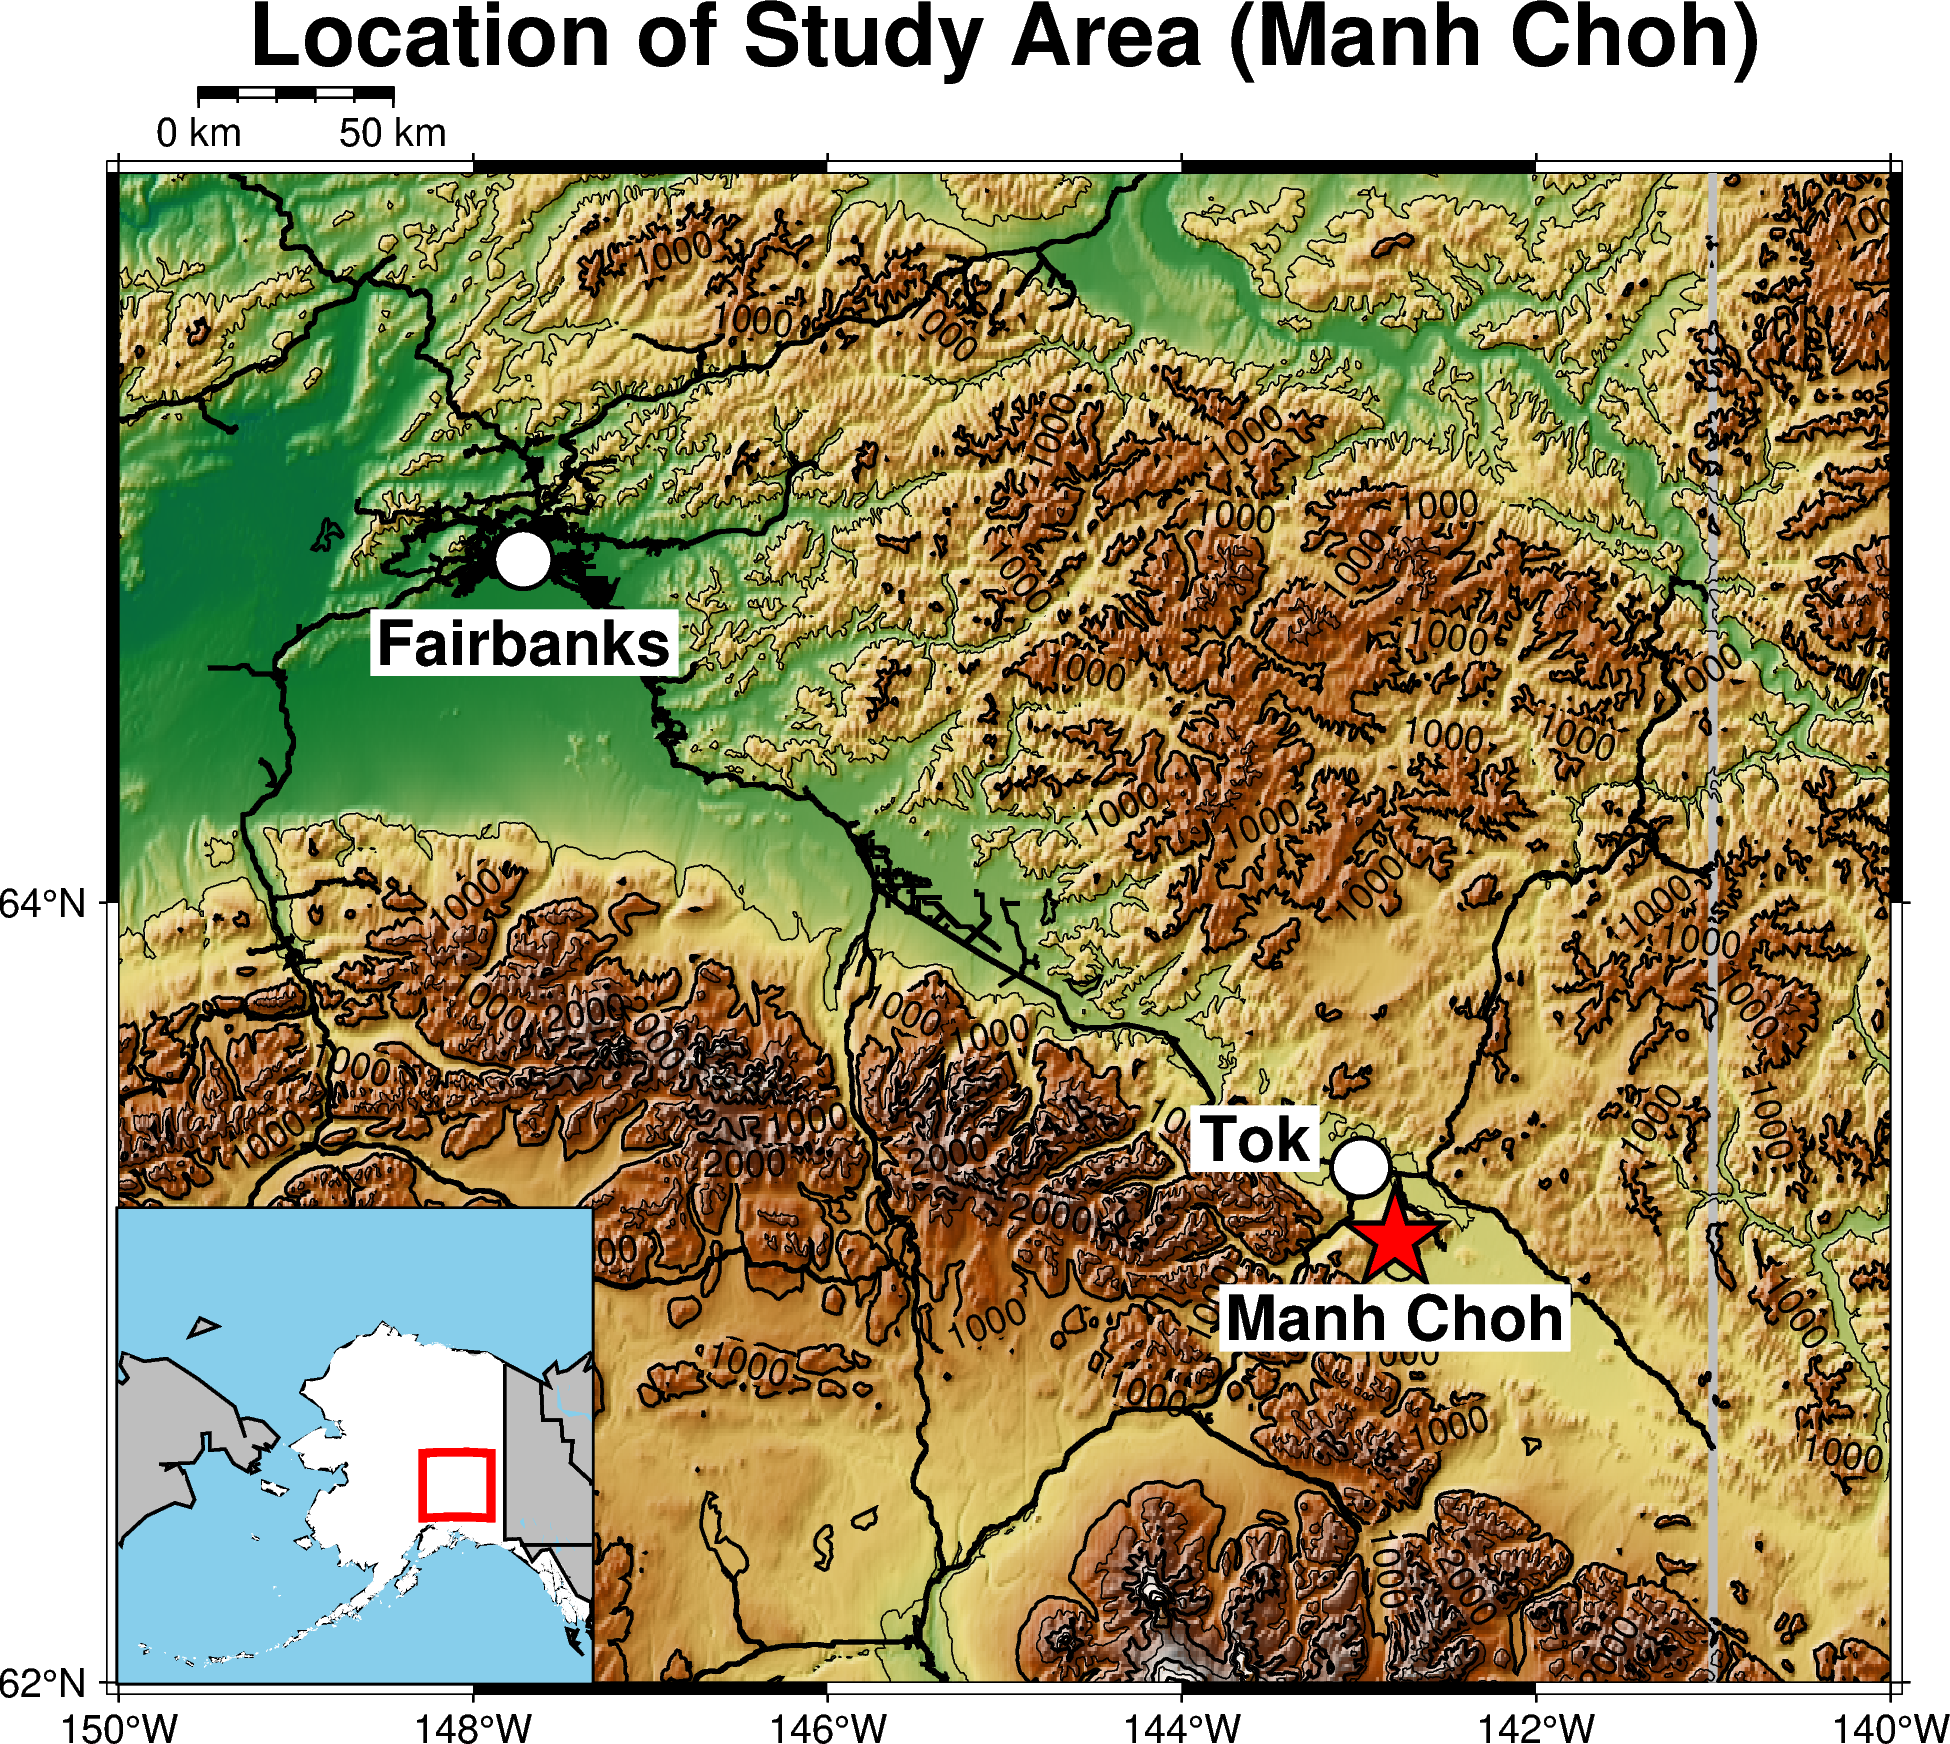

In [169]:

## Setting up points and values that will be plotted on the map
## Fairbanks
FBX_LON=-147.7164 
FBX_LAT=64.8378
## Tok
TOK_LON=-142.9877
TOK_LAT=63.3359
## Manh Choh
MC_LON=-142.796129
MC_LAT=63.1532

## Region
region=[210,219,62,65.75]

## Roadways
gdf = gpd.read_file(
    "Roads_AKDOT_6859052738519254347.geojson"
)
rich= gdf[gdf.Route_Type == "I"]
alaska = gdf[gdf.Route_Type == "X"]

## Map
fig = pygmt.Figure()
## Load in earth relief
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=[210,220,62,65.75])
fig.grdimage(grid=grid, cmap="geo", projection="M15c", shading=True)
fig.basemap(frame=["a", "+tLocation of Study Area (Manh Choh)"], 
            region=[210,220,62,65.75], projection='M15c', 
            map_scale="n0.1/1.05+w50k+f+u")
fig.coast(
    region=[210,220,62,65.75],
    shorelines="thin",
    projection="M15c",
    borders="1/2p,gray",
)
## Include contour
fig.grdcontour(grid=grid)

## Plotting the points & the roads
fig.plot(data=rich, pen="1p,black", label="CommonName")
fig.plot(data=alaska, pen="1p,black", label="CommonName")
fig.plot(x=TOK_LON, y=TOK_LAT,
         style="c0.5c",
         pen="1p,black",
         cmap="white")
fig.text(x=TOK_LON-0.60,
         y=TOK_LAT+0.075,
         fill="white",
         text="Tok",
         font="15p,Helvetica-Bold,black")
fig.plot(x=FBX_LON,
         y=FBX_LAT,
         style="c0.5c",
         pen="1p,black",
         cmap="white")
fig.text(x=FBX_LON,
         y=FBX_LAT-0.2,
         text="Fairbanks", 
         font="15p,Helvetica-Bold,black",
         fill="white")
fig.plot(x=MC_LON, y=MC_LAT, 
         style="a0.9c", pen="1p,black", 
         cmap="red")
fig.text(x=MC_LON, y=MC_LAT-0.2,
         text="Manh Choh", 
         font="15p,Helvetica-Bold,black", fill="white")

## Adding the inset map of Alaska with a box marking the study area
with fig.inset(position="jBL+w4c",
               box="+pblack"):
    fig.coast(
        region=[170,230,50,76],
        projection="M4c",
        land="gray",
        borders=[1, 2],
        shorelines="1/thin",
        water="skyblue",
        dcw="US.AK+gwhite",
    )
    rectangle = [[region[0], region[2],
                  region[1], region[3]]]
    fig.plot(data=rectangle, style="r+s",
             pen="2p,red")


fig.show()
fig.savefig("location_map.png")


**Figure Number 2**

This code produces a plot of the cooling ages for the rocks I collected for my project & other regional events and dates pulled from literature.

This code uses:
- Pandas
- Matplotlib
- A csv file called "ages_PAG.csv" for my samples and their ages
- plt.axhspan with rounded y-values from the literature to show the extents of events such as metamorphism, putonism, or ages of exposed lithologies in Eastern Interior Alaska.

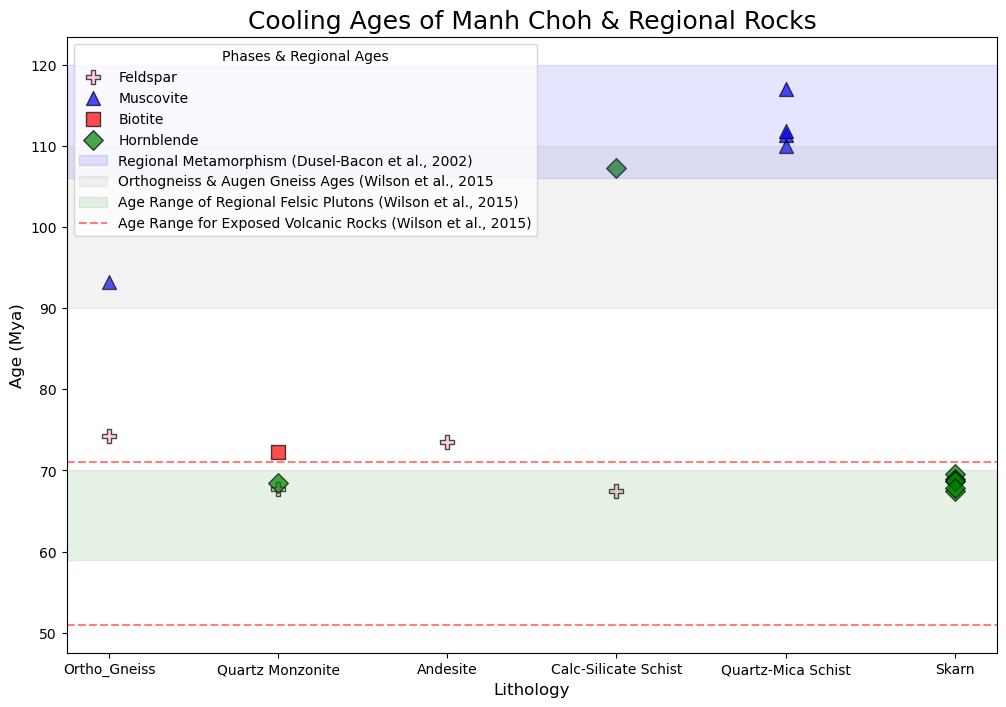

In [180]:

## Read in my data set & clean it up. 
#Keep only the first 17 rows, and change lithology to a string.
ages = pd.read_csv("ages_PAG.csv")
ages["Lithology"] = ages["Lithology"].astype(str)
ages["Phase"] = ages["Phase"].astype(str)
ages = ages.loc[0:17]
#print(ages)
phase = ages["Phase"]
#print(phase)

 
## Create the plot with age on the y-axis and lithology on the x axis
## Each point should be a different shape & color to note the phase that was dated
## Add bars for regional events in the area that have been dated
fig, axs = plt.subplots(figsize=(12, 8), sharey=True)

axs.scatter(ages.Lithology[:4], 
            ages.Integrated[:4], s=100,
            c="pink", marker="P", alpha=0.7, 
            edgecolors="black", label="Feldspar")
axs.scatter(ages.Lithology[4:9],
            ages.Integrated[4:9], s=100, c="Blue",
            marker="^", alpha=0.7, edgecolors="black",
            label="Muscovite")
axs.scatter(ages.Lithology[9:10], 
            ages.Integrated[9:10], s=100, c="red",
            marker="s", alpha=0.7, edgecolors="black", 
            label="Biotite")
axs.scatter(ages.Lithology[10:], ages.Integrated[10:],
            s=100, c="green", marker="D", alpha=0.7, 
            edgecolors="black", label="Hornblende")

## Add bars noting last dated events in the region
plt.axhspan(106, 120, color='blue',
            linestyle='-',
            alpha=0.1,
            label="Regional Metamorphism (Dusel-Bacon et al., 2002)")
plt.axhspan(90, 110,
            linestyle='-', 
            color='grey', alpha=0.1, 
            label="Orthogneiss & Augen Gneiss Ages (Wilson et al., 2015")
plt.axhspan(59, 70, color='green',
            linestyle='-', alpha=0.1,
            label="Age Range of Regional Felsic Plutons (Wilson et al., 2015)")
plt.axhline(71, color='red', 
            linestyle="--", alpha=0.5, 
            label="Age Range for Exposed Volcanic Rocks (Wilson et al., 2015)")
plt.axhline(51, color='red',
            linestyle="--", alpha=0.5)
plt.legend(bbox_to_anchor=(0, 1),
           loc='upper left', 
           markerscale=1, 
           title="Phases & Regional Ages")

## Add axes labels and a title
plt.title("Cooling Ages of Manh Choh & Regional Rocks", fontsize=18)
plt.xlabel("Lithology", fontsize=12)
plt.ylabel("Age (Mya)", fontsize=12)

plt.savefig("cooling_ages.png")
plt.show()

**Figure Number 3**

This code produces a figure that shows the closure temperature (The temperature, or temperature range, at which minerals crystallize) for specific phases I have or will be dating for my research. 

This code uses:
- Matplotlib
- Each mineral phase is assigned a, 
- plt.axhspan with rounded y-values from the literature to show the extents of events such as metamorphism, putonism, or ages of exposed lithologies in Eastern Interior Alaska.

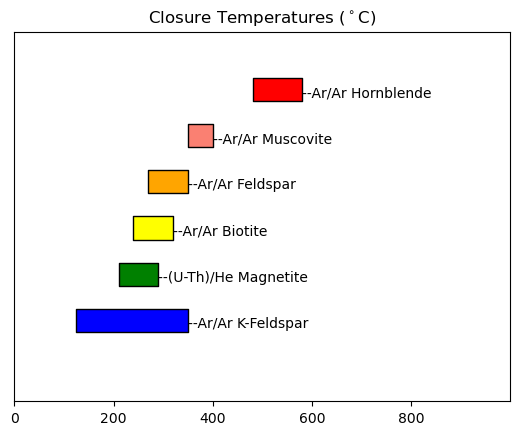

In [174]:
## Closure Temperatures
feldspar = [(270, 80)]
k_feldspar = [(125, 225)]
muscovite = [(350, 50)]
biotite = [(240, 80)]
hornblende = [(480, 100)]
magnetite = [(210, 80)]
## K-Feldspar,magnetite, biotite, feldspar, muscovite, hornblende

fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.broken_barh(feldspar, (4, 0.5), 
               color="orange", 
               edgecolor="black")
ax.text(350, 4.1,
        r'--Ar/Ar Feldspar',
        fontsize=10)
ax.broken_barh(k_feldspar, (1, 0.5), 
               color="blue", 
               edgecolor="black")
ax.text(350, 1.1,
        r'--Ar/Ar K-Feldspar',
        fontsize=10)
ax.broken_barh(muscovite, 
               (5, 0.5), 
               color="salmon", 
               edgecolor="black")
ax.text(400, 5.1,
        r'--Ar/Ar Muscovite', 
        fontsize=10)
ax.broken_barh(biotite, 
               (3, 0.5), 
               color="yellow", 
               edgecolor="black")
ax.text(320, 3.1,
        r'--Ar/Ar Biotite',
        fontsize=10)
ax.broken_barh(hornblende, 
               (6, 0.5), 
               color="red",
               edgecolor="black")
ax.text(580, 6.1,
        r'--Ar/Ar Hornblende', 
        fontsize=10)
ax.broken_barh(magnetite, 
               (2, 0.5), 
               color="green", 
               edgecolor="black")
ax.text(290, 2.1, r'--(U-Th)/He Magnetite', fontsize=10)

plt.xticks(np.arange(0, 1000, step=200))
plt.yticks(np.arange(-0.5, 8.5))
ax.yaxis.set_visible(False)

plt.title(r"Closure Temperatures ($^\circ$C)")
plt.savefig("closure_temps.png")
plt.show()
